In [1]:
import requests
import geopandas as gpd

In [2]:
# Fetch the data from the API
url = "https://plovput.li-st.net/getObjekti/"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()

data

{'type': 'FeatureCollection',
 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}},
 'features': [{'type': 'Feature',
   'properties': {'naziv_objekta': 'Otočić Mrtovnjak',
    'ps_br': '390',
    'e_br': 'E3115',
    'tip_objekta': 11,
    'lucka_kapetanija': 'Zadar',
    'fotografija': 'fotografije/773.jpg',
    'id_ais': None,
    'simbol_oznaka': '/media/simboli/2.png',
    'pk': '773'},
   'geometry': {'type': 'Point', 'coordinates': [15.17517, 44.01113]}},
  {'type': 'Feature',
   'properties': {'naziv_objekta': 'kvar1',
    'ps_br': None,
    'e_br': None,
    'tip_objekta': None,
    'lucka_kapetanija': None,
    'fotografija': '',
    'id_ais': None,
    'simbol_oznaka': None,
    'pk': '1665'},
   'geometry': {'type': 'Point',
    'coordinates': [13.483333333333333, 45.46666666666667]}},
  {'type': 'Feature',
   'properties': {'naziv_objekta': 'test objekt vanjski operater 2',
    'ps_br': None,
    'e_br': None,
    'tip_objekta': None,
    'lucka_kapetanija': None,

In [15]:
if response.status_code == 200:
    geojson_data = response.json()
    gdf = gpd.GeoDataFrame.from_features(geojson_data)
    
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

gdf.head()

,geometry,naziv_objekta,ps_br,e_br,tip_objekta,lucka_kapetanija,fotografija,id_ais,simbol_oznaka,pk
0,POINT (15.17517 44.01113),Otočić Mrtovnjak,390,E3115,11.0,Zadar,fotografije/773.jpg,None,/media/simboli/2.png,773
1,POINT (13.48333 45.46667),kvar1,None,None,NaN,None,,None,None,1665
2,POINT (13.50132 45.501),test objekt vanjski operater 2,None,None,NaN,None,,None,None,1663
3,POINT (13.90998 44.81897),"Svjetleća oznaka Premanturski školjić, E",None,None,12.0,Pula,fotografije/Svj._oz._Premanturski_Školjić.jpg,None,/media/simboli/19.png,1630
4,POINT (13.50132 45.501),Svjetionik 4321,None,None,22.0,None,,None,/media/simboli/68.png,1669


In [12]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          1220 non-null   geometry
 1   naziv_objekta     1220 non-null   object  
 2   ps_br             1009 non-null   object  
 3   e_br              772 non-null    object  
 4   tip_objekta       1218 non-null   float64 
 5   lucka_kapetanija  1215 non-null   object  
 6   fotografija       1220 non-null   object  
 7   id_ais            67 non-null     object  
 8   simbol_oznaka     1218 non-null   object  
 9   pk                1220 non-null   object  
dtypes: float64(1), geometry(1), object(8)
memory usage: 95.4+ KB


<Axes: >

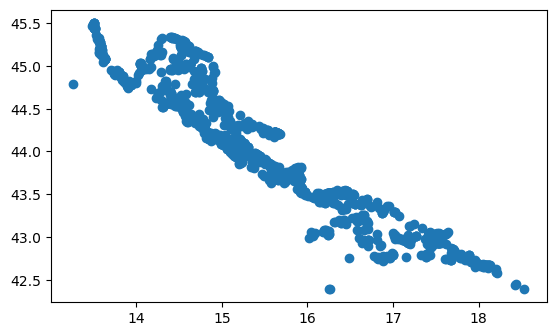

In [17]:
gdf.plot()

In [25]:
crs_name = geojson_data['crs']['properties']['name']
gdf.set_crs(crs_name, inplace=True)
# gdf.set_crs("EPSG:4326", inplace=True)

,geometry,naziv_objekta,ps_br,e_br,tip_objekta,lucka_kapetanija,fotografija,id_ais,simbol_oznaka,pk
0,POINT (15.17517 44.01113),Otočić Mrtovnjak,390,E3115,11.0,Zadar,fotografije/773.jpg,None,/media/simboli/2.png,773
1,POINT (13.48333 45.46667),kvar1,None,None,NaN,None,,None,None,1665
2,POINT (13.50132 45.501),test objekt vanjski operater 2,None,None,NaN,None,,None,None,1663
3,POINT (13.90998 44.81897),"Svjetleća oznaka Premanturski školjić, E",None,None,12.0,Pula,fotografije/Svj._oz._Premanturski_Školjić.jpg,None,/media/simboli/19.png,1630
4,POINT (13.50132 45.501),Svjetionik 4321,None,None,22.0,None,,None,/media/simboli/68.png,1669
...,...,...,...,...,...,...,...,...,...,...
1215,POINT (16.4382 43.16983),Luka Hvar,"617,5",None,14.0,Split,fotografije/1397.jpg,None,/media/simboli/35.png,1397
1216,POINT (16.2332 43.5141),"Seget Donji, marina","539,75",None,14.0,Split,fotografije/1211.jpg,None,/media/simboli/33.png,1211
1217,POINT (15.61027 43.78443),Uvala Lučica,"447,7",None,14.0,Šibenik,fotografije/1286.jpg,None,/media/simboli/33.png,1286
1218,POINT (15.26285 44.08782),"Gaženica, teretna luka, prilaz","396,85",None,14.0,Zadar,fotografije/1444.jpg,None,/media/simboli/37.png,1444


In [26]:
# Save the filtered records to a GeoJSON file
filtered_geojson_path = "filtered_data_from_api.geojson"
gdf.to_file(filtered_geojson_path, driver="GeoJSON")
print(f"Filtered records saved to {filtered_geojson_path}")


Filtered records saved to filtered_data_from_api.geojson
